In [1]:
# Import our dependencies
import hvplot.pandas
import numpy as np
import pandas as pd
import requests
import scipy.stats as st
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import plotly.graph_objects as go
import pandas as pd
import sqlite3
import keras


In [2]:
# change display settings for notebook
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 0)


In [3]:
# import data from database.db
conn = sqlite3.connect('Resources/database.db')
c = conn.cursor()
c.execute("SELECT * FROM players")
data = c.fetchall()

# read data into dataframe
draft_df = pd.DataFrame(data, columns=['player_id',	'player_name',	'year',	'School',	'position_combine',	'height',	'ht',	'weight',	'forty_yard',	'vertical_leap',	'bench_press',	'broad_jump',	'three_cone',	'shuttle_run',	'draft_round',
                        'draft_pick',	'nfl_team',	'position_nfl',	'position_nfl_std',	'bench_press_score',	'broad_jump_score',	'forty_yard_score',	'shuttle_run_score',	'three_cone_score',	'vertical_leap_score',	'combine_score',	'draft_pick_flag'])


conn.close()

draft_df.head()



,player_id,player_name,year,School,position_combine,height,ht,weight,forty_yard,vertical_leap,bench_press,broad_jump,three_cone,shuttle_run,draft_round,draft_pick,nfl_team,position_nfl,position_nfl_std,bench_press_score,broad_jump_score,forty_yard_score,shuttle_run_score,three_cone_score,vertical_leap_score,combine_score,draft_pick_flag
0,2000ABRAHAMJOHNSOU,John Abraham,2000,South Carolina,OLB,6 ft 4 in,76,252.0,4.55,34.5,23.0,118.0,7.09,4.28,1.0,13.0,NYJ,DE,DE,NaN,NaN,4.0,NaN,NaN,NaN,NaN,1
1,2000ALEXANDERSHAUNALA,Shaun Alexander,2000,Alabama,RB,6 ft 0 in,72,218.0,4.58,35.0,20.0,119.0,7.00,4.20,1.0,19.0,SEA,RB,RB,NaN,NaN,2.0,NaN,NaN,NaN,NaN,1
2,2000ALFORDDARNELLBOS,Darnell Alford,2000,Boston Col.,OT,6 ft 4 in,76,334.0,5.56,25.0,23.0,94.0,8.48,4.98,6.0,188.0,KAN,G,G,2.0,1.0,1.0,1.0,1.0,1.0,7.0,1
3,2000ALLAMONKYLETEX,Kyle Allamon,2000,Texas Tech,TE,6 ft 2 in,74,253.0,4.97,29.0,19.5,104.0,7.29,4.49,NaN,NaN,None,None,None,NaN,1.0,1.0,1.0,2.0,1.0,NaN,0
4,2000ANDERSONRASHARDJAC,Rashard Anderson,2000,Jackson State,CB,6 ft 2 in,74,206.0,4.55,34.0,15.0,123.0,7.18,4.15,1.0,23.0,CAR,DB,DB,NaN,3.0,2.0,3.0,1.0,2.0,NaN,1


In [4]:
# read data into dataframe
draft_df = draft_df[['player_id',	'player_name',	'year',	'School',	'position_combine',	'height',	'ht',	'weight',	'forty_yard',	'vertical_leap',	'bench_press',	'broad_jump',	'three_cone',	'shuttle_run',	'draft_round',
                        'draft_pick',	'draft_pick_flag']]
draft_df.head()

,player_id,player_name,year,School,position_combine,height,ht,weight,forty_yard,vertical_leap,bench_press,broad_jump,three_cone,shuttle_run,draft_round,draft_pick,draft_pick_flag
0,2000ABRAHAMJOHNSOU,John Abraham,2000,South Carolina,OLB,6 ft 4 in,76,252.0,4.55,34.5,23.0,118.0,7.09,4.28,1.0,13.0,1
1,2000ALEXANDERSHAUNALA,Shaun Alexander,2000,Alabama,RB,6 ft 0 in,72,218.0,4.58,35.0,20.0,119.0,7.00,4.20,1.0,19.0,1
2,2000ALFORDDARNELLBOS,Darnell Alford,2000,Boston Col.,OT,6 ft 4 in,76,334.0,5.56,25.0,23.0,94.0,8.48,4.98,6.0,188.0,1
3,2000ALLAMONKYLETEX,Kyle Allamon,2000,Texas Tech,TE,6 ft 2 in,74,253.0,4.97,29.0,19.5,104.0,7.29,4.49,NaN,NaN,0
4,2000ANDERSONRASHARDJAC,Rashard Anderson,2000,Jackson State,CB,6 ft 2 in,74,206.0,4.55,34.0,15.0,123.0,7.18,4.15,1.0,23.0,1


In [5]:
# drop rows with position_combine = 'K' or 'P' or 'QB' or 'LS'
draft_df = draft_df[draft_df.position_combine != 'K']
draft_df = draft_df[draft_df.position_combine != 'P']
draft_df = draft_df[draft_df.position_combine != 'QB']
draft_df = draft_df[draft_df.position_combine != 'LS']
draft_df.head()


,player_id,player_name,year,School,position_combine,height,ht,weight,forty_yard,vertical_leap,bench_press,broad_jump,three_cone,shuttle_run,draft_round,draft_pick,draft_pick_flag
0,2000ABRAHAMJOHNSOU,John Abraham,2000,South Carolina,OLB,6 ft 4 in,76,252.0,4.55,34.5,23.0,118.0,7.09,4.28,1.0,13.0,1
1,2000ALEXANDERSHAUNALA,Shaun Alexander,2000,Alabama,RB,6 ft 0 in,72,218.0,4.58,35.0,20.0,119.0,7.00,4.20,1.0,19.0,1
2,2000ALFORDDARNELLBOS,Darnell Alford,2000,Boston Col.,OT,6 ft 4 in,76,334.0,5.56,25.0,23.0,94.0,8.48,4.98,6.0,188.0,1
3,2000ALLAMONKYLETEX,Kyle Allamon,2000,Texas Tech,TE,6 ft 2 in,74,253.0,4.97,29.0,19.5,104.0,7.29,4.49,NaN,NaN,0
4,2000ANDERSONRASHARDJAC,Rashard Anderson,2000,Jackson State,CB,6 ft 2 in,74,206.0,4.55,34.0,15.0,123.0,7.18,4.15,1.0,23.0,1


In [6]:
# drop player_id and player_name and school and height
draft_df = draft_df.drop(['player_id', 'player_name', 'School', 'height', 'draft_round', 'draft_pick'], axis=1)

In [7]:
# use one hot encoding on position_combine
encoder = OneHotEncoder(sparse=False)
encoder_df = pd.DataFrame(encoder.fit_transform(draft_df[["position_combine"]]))
draft_final_df = draft_df.merge(encoder_df, left_index=True, right_index=True)
draft_final_df = draft_final_df.drop("position_combine", axis=1)

encoder_df.head()

c:\Users\inlik\anaconda3\envs\dev2\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Split our preprocessed data into our features and target arrays
y = draft_final_df["draft_pick_flag"].values
X = draft_final_df.drop(["draft_pick_flag"], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=58)


In [9]:
num_classes = 7
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
# Original label of `5` is one-hot encoded as `0000010000`
y_train[0]


array([0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [10]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [11]:
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 100
# hidden_nodes_layer3 = 40

nn_model = tf.keras.models.Sequential()


# First hidden layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,
             input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, activation="relu"))

# nn_model.add(tf.keras.layers.Dense(
#     units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn_model.add(tf.keras.layers.Dense(num_classes, activation="softmax"))

# Check the structure of the model
nn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2300      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 7)                 707       
                                                                 
Total params: 13107 (51.20 KB)
Trainable params: 13107 (51.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Compile the model
nn_model.compile(loss='categorical_crossentropy',
                 optimizer='adam', metrics=['accuracy'])


In [13]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=150)


Epoch 1/150
101/101 [==============================] - 1s 728us/step - loss: 0.7836 - accuracy: 0.5874
Epoch 2/150
101/101 [==============================] - 0s 721us/step - loss: 0.6323 - accuracy: 0.6518
Epoch 3/150
101/101 [==============================] - 0s 725us/step - loss: 0.6228 - accuracy: 0.6558
Epoch 4/150
101/101 [==============================] - 0s 720us/step - loss: 0.6089 - accuracy: 0.6654
Epoch 5/150
101/101 [==============================] - 0s 738us/step - loss: 0.6103 - accuracy: 0.6688
Epoch 6/150
101/101 [==============================] - 0s 749us/step - loss: 0.5955 - accuracy: 0.6785
Epoch 7/150
101/101 [==============================] - 0s 720us/step - loss: 0.5935 - accuracy: 0.6816
Epoch 8/150
101/101 [==============================] - 0s 732us/step - loss: 0.5874 - accuracy: 0.6918
Epoch 9/150
101/101 [==============================] - 0s 761us/step - loss: 0.5787 - accuracy: 0.6965
Epoch 10/150
101/101 [==============================] - 0s 701us/step - l

In [14]:
# Evaluate the model using the training data
# Make sure you evaluate the scaled data
model_loss, model_accuracy = nn_model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


34/34 - 0s - loss: 1.8344 - accuracy: 0.6058 - 144ms/epoch - 4ms/step
Loss: 1.8343983888626099, Accuracy: 0.6057782173156738


In [15]:
# Evaluate the model using the training data
# Make sure you evaluate the scaled data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

34/34 - 0s - loss: 1.8344 - accuracy: 0.6058 - 33ms/epoch - 971us/step
Loss: 1.8343983888626099, Accuracy: 0.6057782173156738


In [16]:
from keras.models import Model
model = Model(inputs=nn_model.input, outputs=nn_model.get_layer('dense_2').output)
output = model.predict(X_test_scaled)
print(model.summary())

34/34 [==============================] - 0s 630us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 22)]              0         
                                                                 
 dense (Dense)               (None, 100)               2300      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 7)                 707       
                                                                 
Total params: 13107 (51.20 KB)
Trainable params: 13107 (51.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [17]:
print(fit_model.history.keys())

dict_keys(['loss', 'accuracy'])


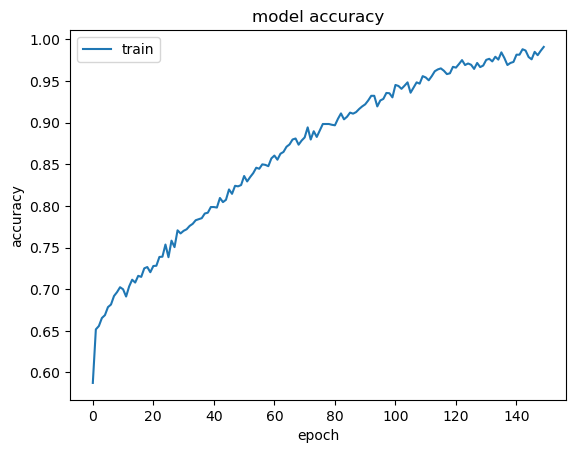

In [18]:

# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

plt.plot(fit_model.history['accuracy'])
# plt.plot(fit_model.history['modelval_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

